# Energy Consumption and CO2 Emissions Analysis
## Statistical Analysis

**Prerequisites:**
- Completed notebook 01_data_exploration_and_cleaning.ipynb
- Cleaned dataset: cleaned_energy_data.csv

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Load Cleaned Dataset

In [2]:
from pathlib import Path
import os

current_dir = Path.cwd()
parent = current_dir.parent

os.chdir(parent)
current_dir = str(Path.cwd())   # update the variable so future code is consistent
print("New current directory:", current_dir)
processed_file_path = current_dir+'\\dataset\\processed\\cleaned_energy_data.csv'
df = pd.read_csv(processed_file_path)

New current directory: d:\Code Institute\Energy-Consumption-CO2-Emissions-Analysis


In [3]:
print(f"Dataset loaded: {len(df):,} records")
print(f"Columns: {len(df.columns)}")
print(f"\nDate range: {df['Year'].min()} - {df['Year'].max()}")
print(f"Countries: {df['Country'].nunique()}")
print(f"Energy categories: {df['Energy_category'].nunique()}")

Dataset loaded: 46,000 records
Columns: 16

Date range: 1980 - 2019
Countries: 230
Energy categories: 5


## Descriptive Statistics

### Central Tendency Measures

**Mean, Median, and Mode** help us understand the typical values in our dataset.

In [4]:
# Calculate descriptive statistics for key variables
variables = ['Energy_consumption', 'Energy_production', 'GDP', 'Population', 'CO2_emission']

print("Descriptive Statistics:")
print("=" * 100)

stats_df = pd.DataFrame()
for var in variables:
    stats_df[var] = [
        df[var].mean(),
        df[var].median(),
        df[var].std(),
        df[var].min(),
        df[var].max(),
        df[var].quantile(0.25),
        df[var].quantile(0.75)
    ]

stats_df.index = ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1 (25%)', 'Q3 (75%)']
print(stats_df.round(3))


Descriptive Statistics:
          Energy_consumption  Energy_production        GDP   Population  \
Mean                   0.370              0.369    413.236    31267.262   
Median                 0.000              0.000     46.843     6062.460   
Std Dev                2.387              2.326   1449.011   123077.818   
Min                   -0.163             -0.000      0.125       11.471   
Max                   96.119             88.513  23128.340  1434512.000   
Q1 (25%)               0.000              0.000      9.647     1120.020   
Q3 (75%)               0.064              0.017    254.398    19644.050   

          CO2_emission  
Mean            22.104  
Median           0.000  
Std Dev        186.983  
Min             -0.005  
Max           9113.558  
Q1 (25%)         0.000  
Q3 (75%)         1.100  


Interpretation:
- Mean > Median suggests right-skewed distribution (few very large values)
- High standard deviation indicates high variability in the data
- Large difference between Q3 and Max shows presence of outliers

### Distribution Analysis

Visualise the distribution of key variables to understand their shape and spread.

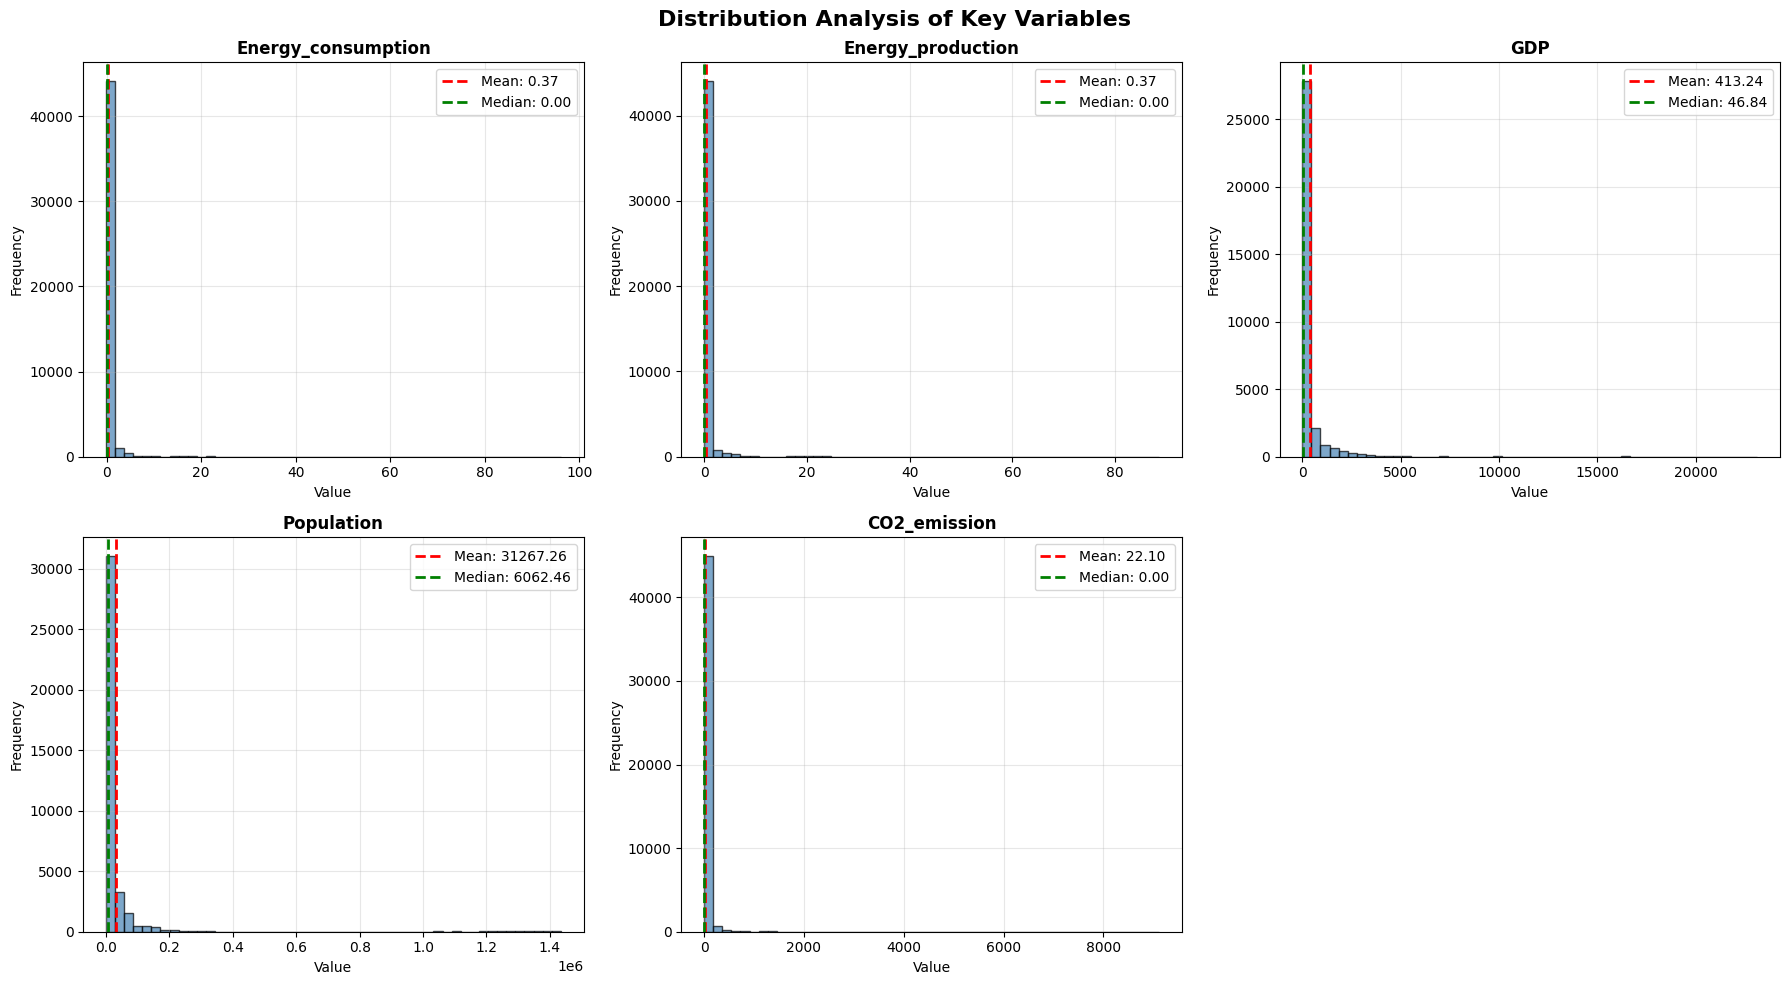

In [5]:
# Create distribution plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution Analysis of Key Variables', fontsize=16, fontweight='bold')

for idx, var in enumerate(variables):
    row = idx // 3
    col = idx % 3
    
    # Histogram with KDE
    axes[row, col].hist(df[var].dropna(), bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[row, col].axvline(df[var].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[var].mean():.2f}')
    axes[row, col].axvline(df[var].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[var].median():.2f}')
    axes[row, col].set_title(var, fontweight='bold')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

# Remove extra subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

## Correlation Analysis

Examine relationships between variables using correlation coefficients.

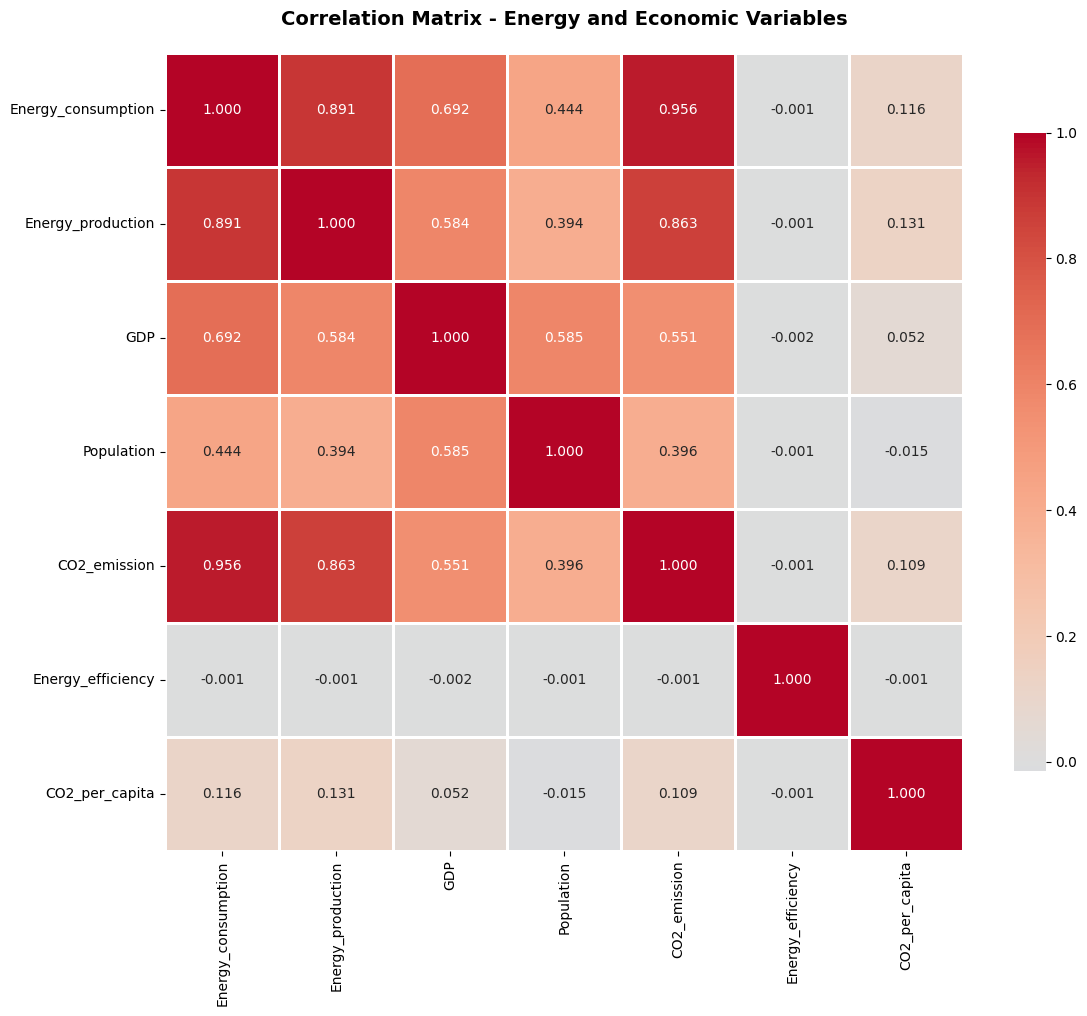


Key Correlations:

Top 10 Strongest Correlations:
 1. Energy_consumption             <-> CO2_emission                  :   0.956
 2. Energy_consumption             <-> Energy_production             :   0.891
 3. Energy_production              <-> CO2_emission                  :   0.863
 4. Energy_consumption             <-> GDP                           :   0.692
 5. GDP                            <-> Population                    :   0.585
 6. Energy_production              <-> GDP                           :   0.584
 7. GDP                            <-> CO2_emission                  :   0.551
 8. Energy_consumption             <-> Population                    :   0.444
 9. Population                     <-> CO2_emission                  :   0.396
10. Energy_production              <-> Population                    :   0.394


In [6]:
# Calculate correlation matrix
correlation_vars = ['Energy_consumption', 'Energy_production', 'GDP', 'Population', 
                   'CO2_emission', 'Energy_efficiency', 'CO2_per_capita']

corr_matrix = df[correlation_vars].corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Energy and Economic Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nKey Correlations:")
print("=" * 80)

# Find strongest correlations
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append((
            corr_matrix.columns[i],
            corr_matrix.columns[j],
            corr_matrix.iloc[i, j]
        ))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("\nTop 10 Strongest Correlations:")
for i, (var1, var2, corr) in enumerate(corr_pairs[:10], 1):
    print(f"{i:2d}. {var1:30s} <-> {var2:30s}: {corr:7.3f}")

### Summary of Statistical Findings:

#### Descriptive Statistics:
- The data shows high variability across countries and energy types
- Right-skewed distributions indicate that a few countries dominate global energy consumption
- Strong positive correlation between GDP and energy consumption (r > 0.8)